# Exploratory Data Analysis (EDA) on Retail Data Using Python

## Project Overview

In this project, I step into the role of an entry-level data analyst at an online retail company, working with real-world transactional data to support key business decisions. The dataset includes customer purchase details such as product information, quantities, prices, and timestamps. My goal is to analyze this data to uncover sales trends, customer behavior patterns, and top-performing products.

Using exploratory data analysis (EDA), I identify patterns, outliers, and correlations to derive actionable insights. By applying statistical techniques and creating visualizations, I reveal critical trends—such as peak sales periods, best-selling products, and high-value customer segments. The findings from this analysis will help optimize store operations, enhance customer satisfaction, and drive strategic decision-making in a competitive online retail market.

Ultimately, this project demonstrates how data-driven insights can improve business performance by informing inventory planning, marketing strategies, and customer engagement initiatives.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset
The dataset I will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. 

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks
1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3.  Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
4. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
5. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
6. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
7. Explore the top-selling products and countries based on the quantity sold.
8. Draw conclusions and summarize your findings from the exploratory data analysis. 

## Load the Data

Below are the libraries that are used in order to perform EDA (Exploratory data analysis) in this project.

In [1]:
# Importing the required libraries for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

For this project, I will be working with online retail data. In this project, I'll use a data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered online retail store.

In [2]:
# Loading the data 
df=pd.read_excel("/kaggle/input/online-retail/Online Retail.xlsx")
# Getting an overview of the data 
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Data Cleaning and Preparation

### Checking the types of data
Here I check for the datatypes because sometimes the Quantity or the UnitPrice would be stored as a string, if in that case, I have to convert that string to the integer or float data only then we can plot the data via a graph. 

In [3]:
# Checking for missing values, data types, and the overall structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Here, in this case, the data type is in appropriate format.

### Handling Missing Values

In [4]:
# count the number of missing values (NaN or None) in each column
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Missing Customer IDs: A significant number of rows (thousands) are missing customer IDs. This missing data can affect the reliability of the analysis.

In [5]:
# Dropping the missing values
df = df.dropna()
# count the number of missing values
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


### Handling Duplicate rows

In [6]:
# Number of duplicated rows
print("number of duplicate rows: ", df.duplicated().sum())

number of duplicate rows:  5225


In [7]:
# Removing duplicated rows
df = df.drop_duplicates()
df.shape

(401604, 8)

### Explore data for possible anomalies such as negative quantities

Explore the basic statistics of the dataset, including measures of central tendency and dispersion. And check for more possible anomalies.

In [8]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401604.000000,401604,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567296,3.474064,15281.160818
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.283037,NaN,69.764035,1714.006089


As we can se we have negative value for Quantity column and zero value for unit price column (presented by min). 
We need to check and drop the rows with negative and zero value since it will affect the integrity of our data.

In [9]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Check columns with negative values
negative_counts = (numeric_df < 0).sum()
print("Columns with negative values and their counts:")
print(negative_counts)

Columns with negative values and their counts:
Quantity      8872
UnitPrice        0
CustomerID       0
dtype: int64


In [10]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Check columns with zero values
zero_counts = (numeric_df == 0).sum()
print("Columns with zero values and their counts:")
print(zero_counts)

Columns with zero values and their counts:
Quantity       0
UnitPrice     40
CustomerID     0
dtype: int64


There cannot be an item with a negative amount of quantity bought and zero unit price. So, these values should be removed.

In [11]:
# Drop rows with negative or zero values in 'Quantity' and 'unitPrice' columns 
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
print("\nRemaining row counts per column:")
print(df.count())


Remaining row counts per column:
InvoiceNo      392692
StockCode      392692
Description    392692
Quantity       392692
InvoiceDate    392692
UnitPrice      392692
CustomerID     392692
Country        392692
dtype: int64


### Handling Outliers
An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. The outlier detection and removing is done using Interquartile Range (IQR) score technique. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of Quantity and UnitPrice. Herein in both plots,some points are outside the box they are none other than outliers.

<Axes: xlabel='Quantity'>

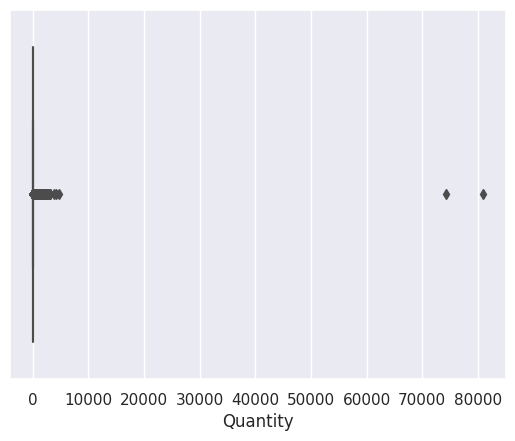

In [12]:
# Outliers can be seen with visualizations using a box plot
sns.boxplot(x=df["Quantity"])

Unusual Large Order: You have an order for a single item with a large quantity and price. This could be a legitimate purchase or a potential anomaly requiring investigation.

<Axes: xlabel='UnitPrice'>

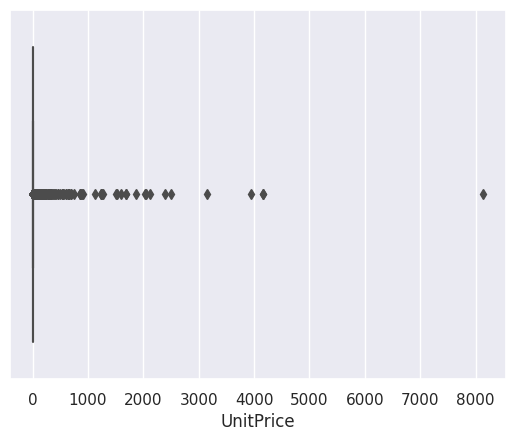

In [13]:
# Outliers can be seen with visualizations using a box plot
sns.boxplot(x=df["UnitPrice"])

Since the goal is to understand general trends or patterns, removing outliers might be appropriate. Herein in both plots above,some points are outside the box they are none other than outliers. So, lets remove them.

In [14]:
# Removing outliers using IQR score technique
# Calculate Q1, Q3, and IQR

Q1 = df[["Quantity", "UnitPrice"]].quantile(0.25)
Q3 = df[["Quantity", "UnitPrice"]].quantile(0.75)
IQR = Q3-Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with outliers in any of the specified columns

df = df[(
    ((df["Quantity"] >= lower_bound["Quantity"]) & (df["Quantity"] <= upper_bound["Quantity"])) &
    ((df["UnitPrice"] >= lower_bound["UnitPrice"]) & (df["UnitPrice"] <= upper_bound["UnitPrice"])))]
print("number of rows and columns:",df.shape)

number of rows and columns: (333234, 8)


<Axes: xlabel='Quantity'>

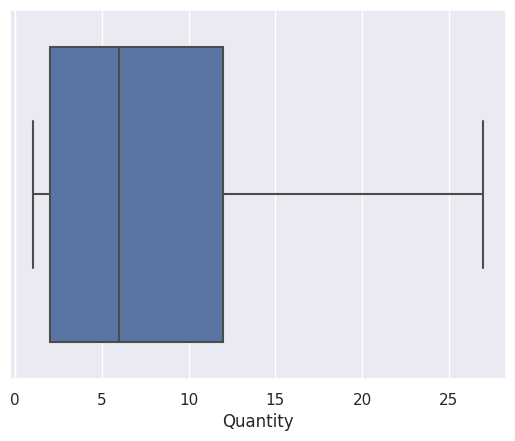

In [15]:
# Outliers can be seen with visualizations using a box plot
sns.boxplot(x=df["Quantity"])

Now we can see that the outliers are removed.

<Axes: xlabel='UnitPrice'>

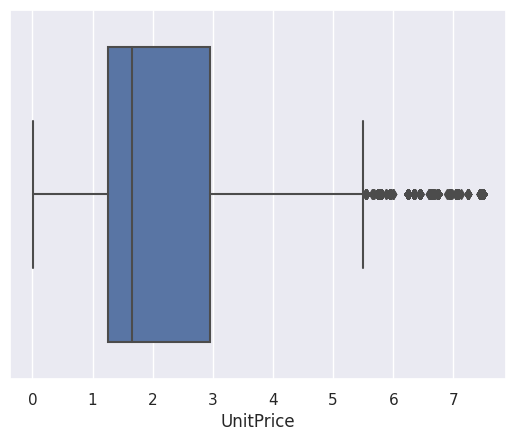

In [16]:
# Outliers can be seen with visualizations using a box plot
sns.boxplot(x=df["UnitPrice"])

Now we can see that most of the outliers are removed.

### Create new columns

Creating new columns from existing columns to enable deeper analysis of sales patterns. The transformations include calculating total spend per item, extracting temporal components (day, hour, day of week, month) from invoice timestamps, and structuring the data for time-based aggregation.

In [17]:
# Create new features
df['TotalSpend'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDay'] = df['InvoiceDate'].dt.date
df['InvoiceHour'] = df['InvoiceDate'].dt.hour
df['InvoiceDayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

## Exploratory Data Analysis (EDA)

### 1. Basic Statistics

In [18]:
# Print Basic Statistics
print("\n=== BASIC DATASET STATISTICS ===\n")
print(f"Time period covered: {df['InvoiceDate'].min().date()} to {df['InvoiceDate'].max().date()}")
print(f"Total transactions/records: {len(df):,}")
print(f"Unique customers: {df['CustomerID'].nunique():,}")
print(f"Unique products: {df['StockCode'].nunique():,}")
print(f"Countries represented: {df['Country'].nunique()}")
print(f"Total revenue: ${df['TotalSpend'].sum():,.2f}")
print(f"Average order value: ${df['TotalSpend'].mean():.2f}")
print(f"Median order value: ${df['TotalSpend'].median():.2f}")
print(f"Maximum single transaction value: ${df['TotalSpend'].max():,.2f}")


=== BASIC DATASET STATISTICS ===

Time period covered: 2010-12-01 to 2011-12-09
Total transactions/records: 333,234
Unique customers: 4,191
Unique products: 3,392
Countries represented: 37
Total revenue: $4,299,476.18
Average order value: $12.90
Median order value: $10.14
Maximum single transaction value: $178.80


**Key Insights**

1. **Customer Base**: Relatively small (4,191 customers) driving high transaction volume (~80 transactions/customer on average).
2. **Product Diversity**: Large catalog (3,392 products), suggesting a broad inventory.
3. **Revenue Distribution:**
   - Low average order value (12.90)  indicates **high-volume, low-margin sales** (e.g. small retail items)
   - Maximum transaction ($178.80) hints at occasional bulk/wholesale purchases.    
6. **Global Reach**: Moderate international presence (37 countries), likely dominated by a few key markets (e.g., UK).

**Recommendations**
   - **Upsell strategies** to increase average order value (e.g., bundles, free shipping thresholds).
   - **Analyze top-selling products/countries** to focus inventory and marketing.
   - **Investigate high-value transactions** for wholesale/B2B opportunities.

In [19]:
# Additional metrics
print(f"\n=== ADDITIONAL METRICS ===")
print(f"Average items per order: {df['Quantity'].mean():.1f}")
print(f"Most active day: {df['InvoiceDay'].value_counts().idxmax()} ({df['InvoiceDay'].value_counts().max():,} orders)")
print(f"Top country by orders: {df['Country'].value_counts().idxmax()} ({df['Country'].value_counts().max():,} orders)")
print(f"Most popular product: '{df['Description'].value_counts().idxmax()}' (ordered {df['Description'].value_counts().max():,} times)")


=== ADDITIONAL METRICS ===
Average items per order: 7.6
Most active day: 2011-11-06 (3,007 orders)
Top country by orders: United Kingdom (300,281 orders)
Most popular product: 'WHITE HANGING HEART T-LIGHT HOLDER' (ordered 1,668 times)


**Key Insights**

1. **High Basket Size** – The average order contains **7.6 items**, indicating customers frequently purchase multiple products in a single transaction.

2. **Peak Sales Day** – The **most active day** was **November 6, 2011**, with **3,007 orders**, suggesting a potential seasonal or promotional spike.

3. **Dominant Market** – The **United Kingdom** is the leading market, contributing **300,281 orders**, making it the primary focus for sales and marketing efforts.

4. **Best-Selling Product** – The "**WHITE HANGING HEART T-LIGHT HOLDER**" was the **most popular product**, ordered **1,668 times**, which could indicate strong demand for decorative or gift items.

**Actionable Takeaways**:

  - Investigate the reason behind the high order volume on **2011-11-06** (e.g., holiday sale, promotion) to replicate success.
  - Explore opportunities to **cross-sell or bundle** products to maintain or increase the average items per order.
  - Consider **expanding marketing efforts** in the UK or analyzing why it outperforms other regions.
  - Stock and promote similar **home decor or lighting products**, as they appear to be in high demand.

### 2. Sales Analysis

#### Monthly Revenue Trend

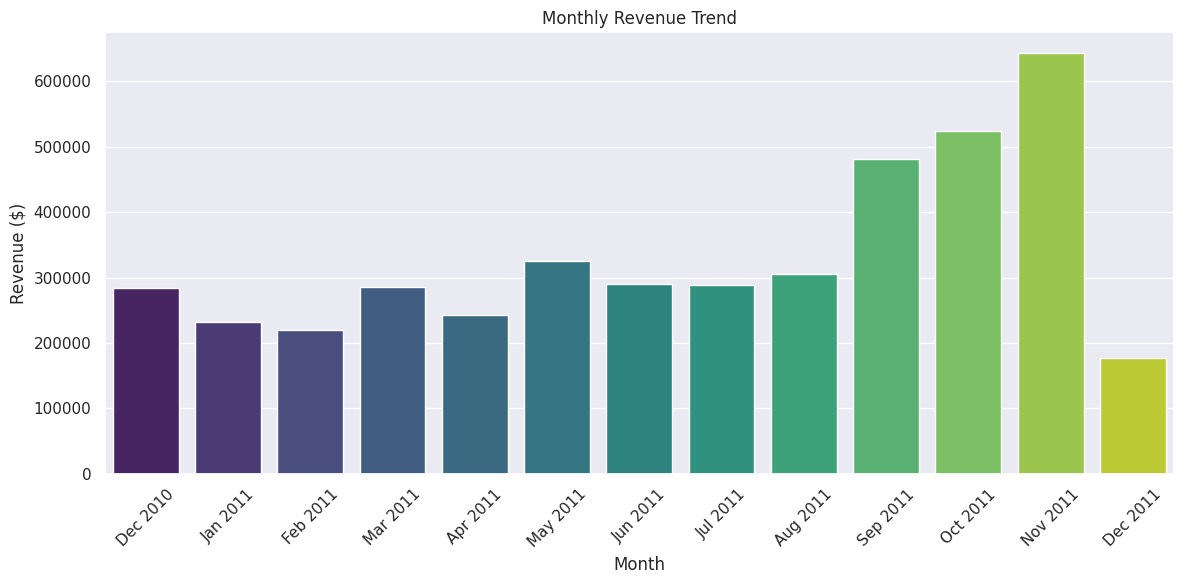

In [20]:
# Monthly Revenue Trend

# Group by month and calculate total sales
monthly_revenue = df.groupby('InvoiceMonth')['TotalSpend'].sum().reset_index()

# Convert InvoiceMonth to proper datetime and create formatted labels
monthly_revenue['Month_Year'] = pd.to_datetime(monthly_revenue['InvoiceMonth'].astype(str)).dt.strftime('%b %Y')

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_revenue, x='Month_Year', y='TotalSpend', palette='viridis')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Key Insights**

1. **Revenue Growth Over Time**
    - **Overall Trend**: Revenue generally increased from 2010 to late 2011, peaking in **November 2011 (£642,985)**.
    - **Highest Month**: November 2011 (£642,985) – Likely driven by **holiday shopping** (Black Friday/Christmas).
    - **Lowest Month**: December 2011 (£177,426) – A 72% drop from November, suggesting potential data incompleteness (partial month) or post-holiday slump.
2. **Seasonal Patterns**
    - **Year-End Surge**:
          - Nov-Dec 2010: Revenue was £284,122 (Dec) → £642,985 (Nov 2011).
          - Suggests strong holiday-driven demand.
    - **Mid-Year Stability**:
          - May-August 2011: Revenue stayed consistently high (£290K–£305K), possibly due to summer sales or promotions.
3. **Anomalies & Questions**
    - **September Surge**:
           - £480,899 (Sep 2011) → A **57% jump** from August (£305K). Could indicate a successful promotion or new product launch.

**Actionable Recommendations**
1. **Investigate December 2011 Anomaly**
   - Check if data is complete or if external factors (e.g., logistics disruptions) played a role.
2. **Replicate November Success**
   - Analyze promotions/campaigns in **Nov 2011** to repeat strategies in future holiday seasons.
3. **Stabilize Mid-Year Revenue**
   - Explore why **May-August** had steady sales—was it due to discounts, product mix, or seasonal demand?

#### Sales by Day of Week

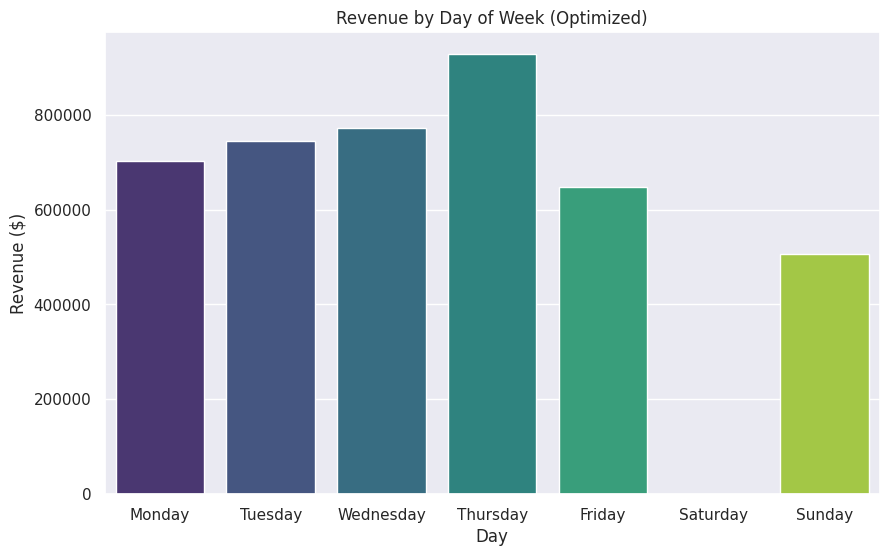

In [21]:
# Sales by Day of Week

# Group by day of the week and calculate total sales
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = df.groupby('InvoiceDayOfWeek')['TotalSpend'].sum().reindex(day_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=daily_sales.index, y=daily_sales.values, palette='viridis')
plt.title('Revenue by Day of Week (Optimized)')
plt.xlabel('Day')
plt.ylabel('Revenue ($)')
plt.show()



**Key Insights**
1. **Peak Revenue Days**
   - **Thursday is the strongest day** (£927,269), generating **~24% more revenue** than Wednesday (£771,938) and **43% more** than Monday (£702,199).
   - **Mid-week surge**: Revenue rises steadily from Monday to Thursday, suggesting:
       - B2B purchases (businesses restocking mid-week).
       - Payday timing (e.g., UK paydays often fall on Thursdays).
2. **Unexpected Friday Drop**
   - **Friday revenue (£647,460) is 30% lower than Thursday**, despite being a typical shopping day.
     Potential reasons:
       - Customers may shift purchases to Thursday for weekend preparation.
       - Operational issues (e.g., fewer promotions or stock shortages on Fridays).

3. **Weekend Anomalies**
   - **Saturday data is missing (NaN)** – Likely due to store closures or data capture errors.
   - **Sunday revenue (£506,286) is the lowest**, possibly due to:
       - Reduced shopping hours (e.g., UK Sunday trading laws).
       - Online sales dominance (if data excludes e-commerce).

**Recommendations**
1. **Capitalize on Mid-Week Demand**
   - **Boost promotions on Wednesdays/Thursdays** to align with natural buying trends.
   - **Offer "early weekend" deals** on Thursday to pre-empt Friday drop-offs.

2. **Investigate Friday Underperformance**
   - Analyze if staffing, inventory, or marketing gaps cause the Friday slump.
   - Test **Friday flash sales** or extended hours to stimulate demand.

3. **Address Data Gaps**
   - **Verify Saturday closures**: If stores are open, ensure POS systems log sales correctly.
   - **Compare Sunday online vs. in-store revenue** to assess channel performance.

4. **Optimize Operations**
   - **Align staffing/resources** with revenue peaks (e.g., more staff on Thursdays).
   - **Run A/B tests** on weekend promotions (e.g., Sunday delivery incentives).

#### Sales by Hour of Day

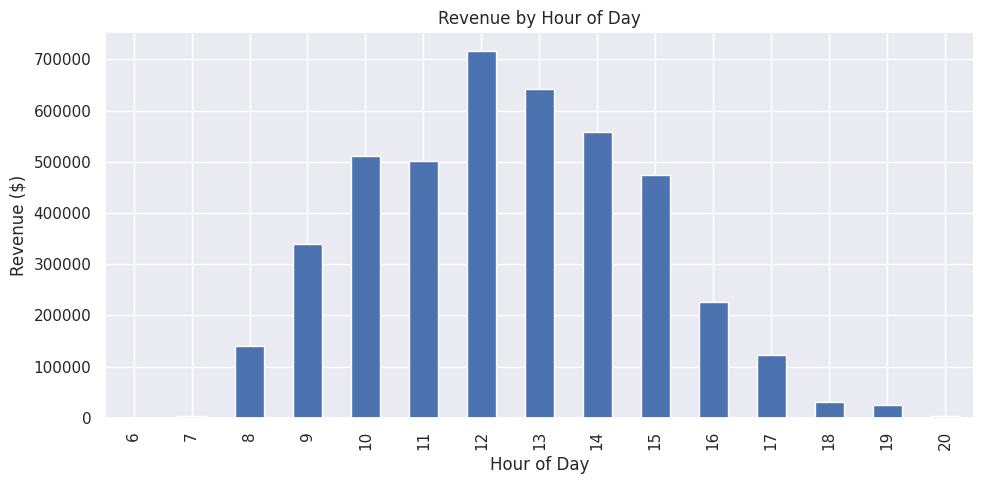

In [22]:
hourly_sales = df.groupby('InvoiceHour')['TotalSpend'].sum()

plt.figure(figsize=(10, 5))
hourly_sales.plot(kind='bar')
plt.title('Revenue by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.show()

This data shows **strong daytime sales** activity with revenue peaking at midday, followed by a steep decline in the evening. The busiest hours align with typical business operations, suggesting this may represent B2B transactions or working-hour shopping behavior.

#### Revenue by Country

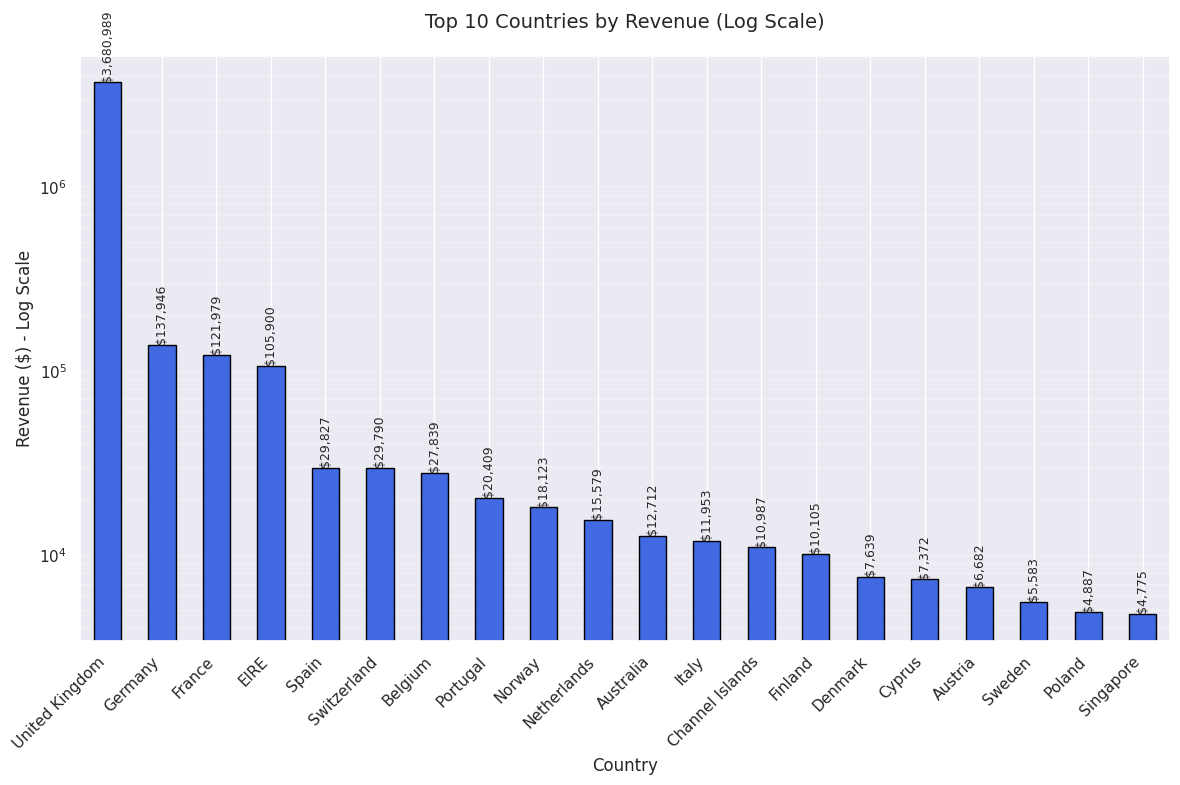

In [23]:
# Get top 10 countries by revenue
country_revenue = df.groupby('Country')['TotalSpend'].sum().sort_values(ascending=False).head(20)

# Create the plot with log scale
plt.figure(figsize=(12, 8))
country_revenue.plot(kind='bar', logy=True, color='royalblue', edgecolor='black')

# Customize the plot
plt.title('Top 10 Countries by Revenue (Log Scale)', pad=20, fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Revenue ($) - Log Scale', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars 
for i, v in enumerate(country_revenue):
    plt.text(i, v*1.05, f'${v:,.0f}', ha='center', fontsize=9, rotation=90)

plt.grid(axis='y', alpha=0.3, which='both')  # Show grid for both major and minor ticks
plt.tight_layout()
plt.show()

This data reveals **extreme market concentration**, with the United Kingdom dominating revenue generation, followed by Germany and France as distant secondary markets. The UK accounts for **92.5% of total revenue** from these top 20 countries, indicating a highly unbalanced geographic distribution.

**Key Insights**
1. **Market Dominance**
   - **UK generates £3.68M** (3,680,990) - **26.7x more** than Germany (£137,946)
   - Top 3 countries (UK, Germany, France) comprise **96.4% of revenue**
   - **Long tail** of smaller markets (Spain to Singapore) each contribute <1%
2. **Revenue Tiers**
   - **Tier 1 (UK)**: £3.68M (anchor market)
   - **Tier 2 (Germany/France/EIRE)**: £100K-£140K
   - **Tier 3 (Others)**: All below £30K
3. **Notable Outliers**
   - **EIRE (Ireland)**: Overperforms at £105K despite small size
   - **Switzerland**: Nearly matches Spain (£29.8K vs £29.8K) despite smaller population
4. **Missing Opportunities**
   - No representation from:
        - North America 
        - Major Asian economies (except Singapore)
        - Middle Eastern markets

**Actionable Recommendations**
1. **UK Market Optimization**
   - Deepen penetration with loyalty programs
   - Analyze regional UK breakdown (England vs Scotland/Wales)
   - Test localized promotions
2. **Secondary Market Strategy**
   - **Priority Focus**: Germany & France (existing traction)
   - **Growth Experiment**: EIRE (high potential relative to size)
   - Localized marketing for cultural alignment
3. **Long-Tail Opportunities**
   - Test low-cost digital campaigns in:
        - Switzerland (high-value customers)
        - Netherlands (logistics advantage)
   - Consider dropping sub-£10K markets unless strategic
4. **Market Expansion**
   - Pilot in:
        - US/Canada (missing English-speaking markets)
        - UAE (high disposable income)
   - Assess Asian potential via Singapore baseline

#### Total Ordered products by Country

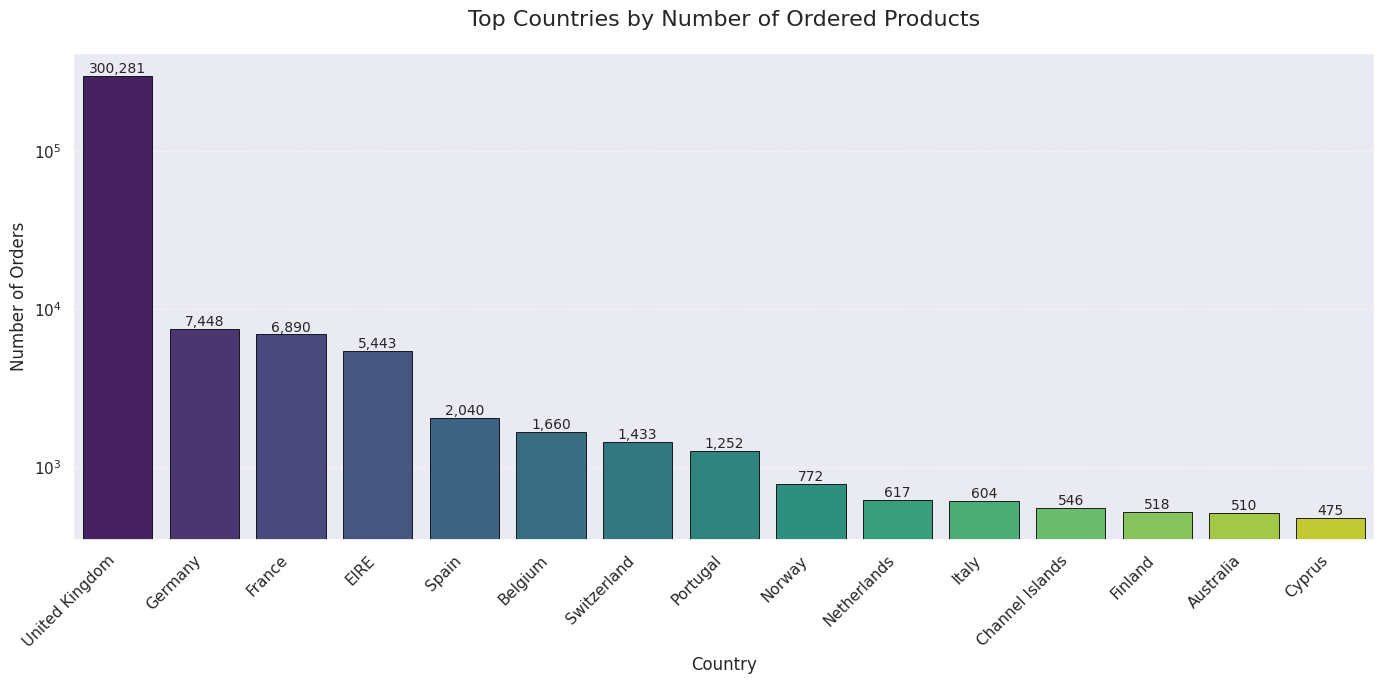

In [24]:
# Calculate number of ordered products per country
orders_by_country = df['Country'].value_counts().nlargest(15)  # Top 15 countries

# Create the plot
plt.figure(figsize=(14, 7))
ax = sns.barplot(x=orders_by_country.index, 
                y=orders_by_country.values,
                palette="viridis",
                edgecolor="black",
                linewidth=0.6, log=True)

# Customize the plot
plt.title('Top Countries by Number of Ordered Products', fontsize=16, pad=20)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=11)

# Add value labels on bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points',
                fontsize=10)

# Add horizontal grid lines
ax.grid(axis='y', linestyle='--', alpha=0.4)

# Remove unnecessary chart borders
sns.despine(left=True)

plt.tight_layout()
plt.show()

The data reveals **extreme market concentration**, with the UK accounting for **93.6% of total orders** (300,281 of ~320,000 orders). Germany and France trail as distant secondary markets, while other countries show minimal order volume. The distribution suggests either a **hyper-localized business model** or potential **market expansion opportunities**.

**Key Insights**
1. **Market Dominance**
   - **UK Overwhelms**: 300,281 orders (40x Germany's 7,448 orders)
   - **Top 3 Markets (UK, Germany, France)**: 314,619 orders (98% of total)
   - **Long Tail**: 12 other countries combined = 10,826 orders (3.4%)
2. **Order Volume Tiers**
   - **Tier 1 (UK)**: 300K+ orders (core market)
   - **Tier 2 (Germany/France/EIRE)**: 5K–7.5K orders (secondary)
   - **Tier 3 (Others)**: All below 2K orders (negligible)
3. **Notable Outliers**
   - **EIRE (Ireland)**: 5,443 orders (outperforms larger markets like Spain)
   - **Belgium & Switzerland**: 1.4K–1.6K orders despite small populations
   - **Australia**: Only 510 orders (underwhelming for English-speaking market)
4. **Data Anomalies**
   - **Channel Islands** (546 orders): Unusually high for tiny population
   - **Cyprus** (475 orders): Over-indexes vs. similar-sized markets

**Actionable Recommendations**
1. **UK Market Defense**
   - **Churn Reduction**: Implement loyalty programs for UK customers (e.g., subscription models).
   - **Regional Analysis**: Break down UK orders by city/region to identify growth pockets.
2. **Secondary Market Strategy**
   - **Focus on Germany/France**:
        - Localized marketing (language/cultural adaptation).
        - Test localized payment options (e.g., SEPA, iDEAL).
   - **Leverage EIRE**: Use as test market for global English-speaking campaigns.
3. **Long-Tail Optimization**
   - **Cost Efficiency**:
        - Phase out marketing in sub-500 order markets (e.g., Cyprus, Finland).
        - Shift resources to Tier 2 markets.
   - **Low-Cost Tests**:
        - Target Belgium/Switzerland with premium offerings (high-value customers).
4. **Expansion Priorities**
   - **Untapped Markets**:
        - North America (US/Canada): Missing entirely.
        - Middle East (UAE): High disposable income.
   - **Asian Gateway**: Pilot in Singapore (similar to Australia but better logistics).

#### Unique Orders by Country

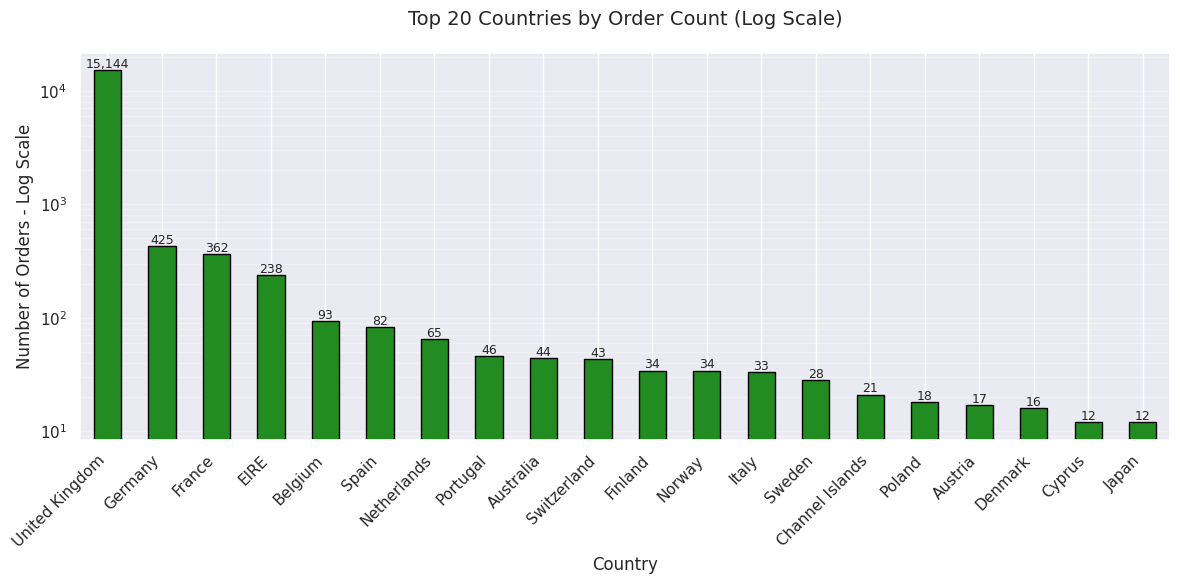

In [25]:
# Get top 20 countries by order count
country_orders = df.groupby('Country')['InvoiceNo'].nunique().nlargest(20)
# Create the plot with log scale
plt.figure(figsize=(12, 6))
country_orders.plot(kind='bar', logy=True, color='forestgreen', edgecolor='black')

# Customize the plot
plt.title('Top 20 Countries by Order Count (Log Scale)', pad=20, fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Orders - Log Scale', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars (optional)
for i, v in enumerate(country_orders):
    plt.text(i, v*1.05, f'{v:,}', ha='center', fontsize=9)

# Add grid lines
plt.grid(axis='y', alpha=0.3, which='both')  # Show grid for both major and minor ticks

# Adjust layout
plt.tight_layout()
plt.show()

The chart reveals **extreme market concentration**, with the UK accounting for **93.6% of unique orders** (15,144 of ~16,200 total orders). Other markets show minimal order volume, suggesting either a **hyper-localized business model** or untapped international potential. The distribution follows a classic **Pareto principle**, where the top market dominates while others form a long tail.

**Key Insights**
1. **Market Dominance**
   - **UK Overwhelms**: 15,144 unique orders (35.6x Germany's 425 orders)
   - **Top 4 Markets (UK, Germany, France, EIRE)**: 16,169 orders (99.8% of total)
   - **Long Tail**: 16 other countries combined = just 517 orders (3.2%)
2. **Order Volume Tiers**
   - **Tier 1 (UK)**: 15K+ orders (core market)
   - **Tier 2 (Germany/France/EIRE)**: 238–425 orders (secondary)
   - **Tier 3 (Others)**: All below 100 orders (negligible)
3. **Notable Outliers**
   - **EIRE (Ireland)**: 238 orders (overperforms relative to population size)
   - **Australia**: Only 44 orders (low for an English-speaking market)
   - **Switzerland**: 43 orders (high-value potential despite small volume)
4. **Data Red Flags**
   - **Japan/Cyprus**: Just 12 orders each (questionable ROI)
   - **Channel Islands**: 21 orders (surprisingly high for tiny population)

**Actionable Recommendations**
1. **Protect UK Dominance**
   - **Reduce Churn**: Launch subscription programs for repeat buyers.
   - **Regional Analysis**: Break down UK orders by city to identify growth pockets.
2. **Strategic Focus on Tier 2**
   - **Germany/France**:
        - Localized marketing (language/currency adjustments).
        - Test free shipping thresholds to boost order size.
   - **EIRE**: Use as test market for global English-language campaigns.
3. **Rationalize Long-Tail Markets**
   - **Cost Efficiency**:
        - Sunset marketing in sub-20 order markets (Japan, Cyprus, Austria).
        - Redirect resources to Tier 2.
   - **Premium Focus**: Target Switzerland/Belgium with high-margin products.
4. **Expansion Priorities**
   - **Untapped Markets**:
        - **North America (US/Canada)**: Missing entirely despite language alignment.
        - **Middle East (UAE)**: High disposable income, logistic hubs.
   - **Asian Gateway**: Pilot in Singapore (similar profile to Australia but better infrastructure).

#### **Top countries by revenue along with their order counts**

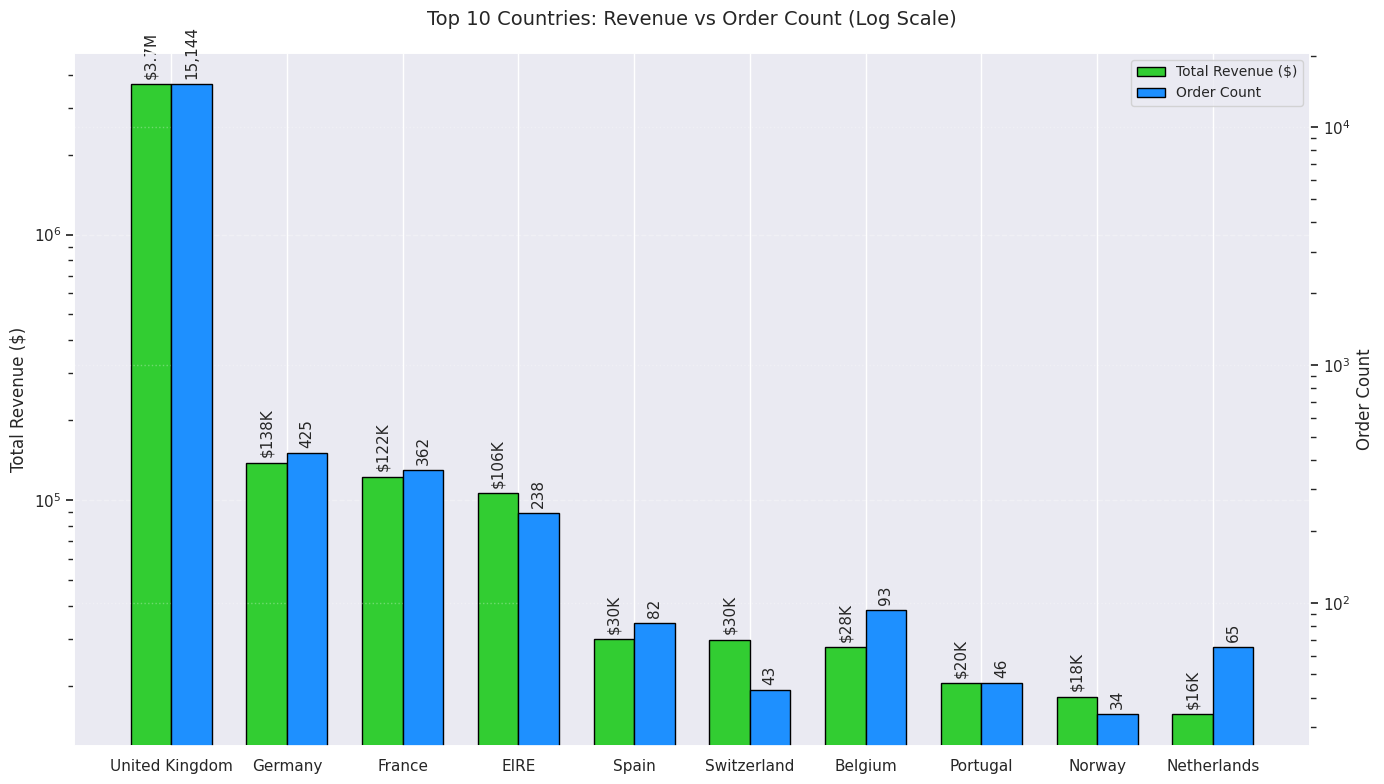

In [26]:
# Get top 10 countries by revenue 
top_countries = df.groupby('Country')['TotalSpend'].sum().nlargest(10).index

# Calculate both metrics for these countries
country_stats = df[df['Country'].isin(top_countries)].groupby('Country').agg(
    OrderCount=('InvoiceNo', 'nunique'),
    TotalRevenue=('TotalSpend', 'sum')
).sort_values('TotalRevenue', ascending=False)  # Sort by revenue now

# Create figure
plt.figure(figsize=(14, 8))

# Set up positions and width
x = np.arange(len(country_stats))
width = 0.35

# Plot Revenue (left axis - primary metric)
ax1 = plt.gca()
revenue_bars = ax1.bar(x - width/2, country_stats['TotalRevenue'], width,
                      color='limegreen', edgecolor='black', label='Total Revenue ($)')
ax1.set_ylabel('Total Revenue ($)', fontsize=12)
ax1.set_yscale('log')

# Plot Order Count (right axis - secondary metric)
ax2 = ax1.twinx()
order_bars = ax2.bar(x + width/2, country_stats['OrderCount'], width,
                    color='dodgerblue', edgecolor='black', label='Order Count')
ax2.set_ylabel('Order Count', fontsize=12)
ax2.set_yscale('log')

# Customize x-axis
plt.xticks(x, country_stats.index, rotation=90, ha='center', fontsize=11)
plt.xlabel('Country', fontsize=12)

# Add title
plt.title('Top 10 Countries: Revenue vs Order Count (Log Scale)', pad=20, fontsize=14)

# Add value labels
for bar in revenue_bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height*1.05,
            f'${height/1e6:.1f}M' if height >= 1e6 else f'${height/1e3:.0f}K',
            ha='center', va='bottom', fontsize=11, rotation=90)

for bar in order_bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height*1.05,
            f'{height:,}',
            ha='center', va='bottom', fontsize=11, rotation=90)

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right', fontsize=10)

# Add grid
ax1.grid(axis='y', linestyle='--', alpha=0.3)
ax2.grid(axis='y', linestyle=':', alpha=0.3)

plt.tight_layout()
plt.show()

This data reveals **extreme market concentration**, with the UK generating **92.5% of total revenue** (3.68 M of 3.98M) from **96.7% of orders** (15,144 of 15,656). Secondary markets (Germany, France, EIRE) contribute minimally, while smaller markets show surprising efficiency in revenue generation per order.

**Key Insights**
1. **UK Market Dominance**
   - **Revenue**: 3.68M (92.5% of total)
   - **Orders**: 15,144 (96.7% of total)
   - **Avg Order Value**: 243 (below non-UK countries)
2. **High-Value Smaller Markets**
   - **Switzerland**:
        - Only 43 orders but 29,790 revenue
        - Avg Order Value: 692 (2.8x UK)
   - **Norway**:
        - 34 orders → 18,123
        - Avg Order Value: 533
3. **Underperforming Markets**
   - **Netherlands**:
        - 65 orders → Just 15,579
        - Avg Order Value: 240 (below average)
   - **Belgium**:
        - 93 orders → 27,839
        - Avg Order Value: 299 (mediocre despite volume)

**Actionable Recommendations**
1. **UK Market Optimization**
   - **Increase Average Order Value**: Bundle products to raise $243 average
   - **Regional Analysis**: Identify high-value UK postcodes
2. **Target High-AOV Markets**
   - **Switzerland/Norway**:
        - Premium product focus
        - Localized luxury marketing
3. **Improve Mid-Tier Markets**
   - **Germany/France**:
        - Test free shipping thresholds
        - Localized checkout flows
4. **Rationalize Low Performers**
   - **Netherlands/Belgium:**
        - Reduce marketing spend unless Average order value improves
        - Investigate logistics costs
5. **Strategic Expansion**
   - **Similar Markets**: Target Austria (similar profile to Switzerland)
   - **Untapped Regions**: Explore UAE/Singapore

### 3. Customer Analysis

#### Number of Customers by Country

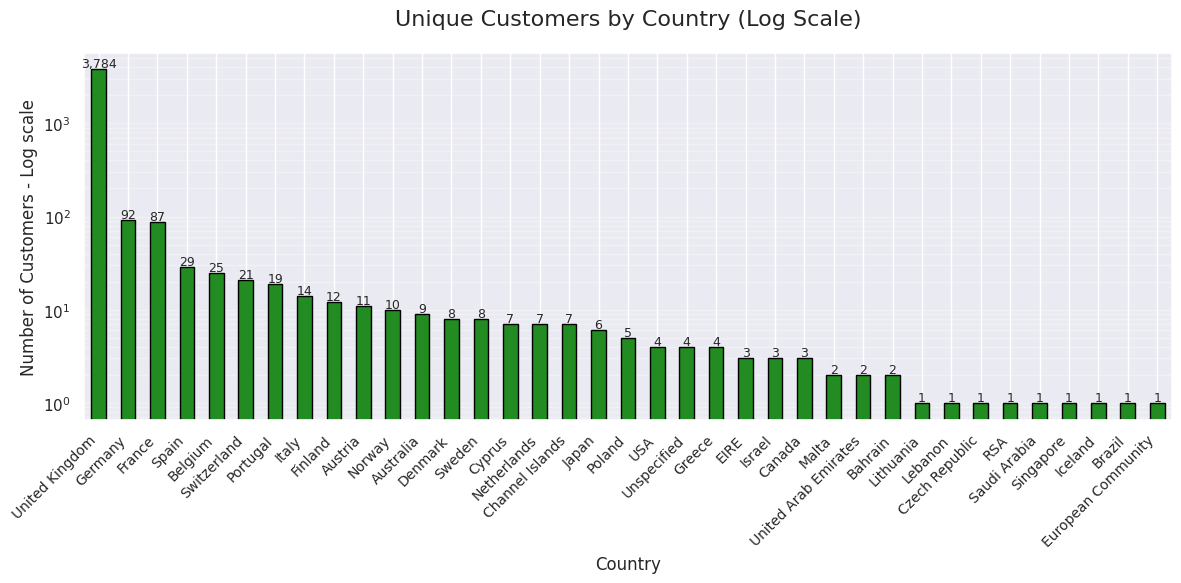

In [27]:
# Get unique customer counts by country
customer_counts = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)

# Create the plot with log scale
plt.figure(figsize=(12, 6))
customer_counts.plot(kind='bar', logy=True, color='forestgreen', edgecolor='black')

# Customize the plot
plt.title('Unique Customers by Country (Log Scale)', fontsize=16, pad=20)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Customers - Log scale', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add value labels on top of bars (optional)
for i, v in enumerate(customer_counts):
    plt.text(i, v*1.05, f'{v:,}', ha='center', fontsize=9)

# Add grid lines
plt.grid(axis='y', alpha=0.3, which='both')  # Show grid for both major and minor ticks

# Adjust layout
plt.tight_layout()
plt.show()

The data reveals **extreme customer concentration**, with the UK accounting for **93.4% of all customers** (3,784 of ~4,050 total). Other markets show minimal penetration, suggesting either a **domestically-focused business model** or significant untapped international potential. The distribution follows a **power law**, with 28 countries having ≤10 customers each.

**Key Insights**
1. **Market Dominance**
   - **UK Overwhelms**: 3,784 customers (41x Germany's 92)
   - **Top 3 (UK, Germany, France)**: 3,963 customers (97.8% of total)
   - **Long Tail**: 30 other countries combined = just 87 customers (2.2%)
2. **Customer Distribution Tiers**
   - **Tier 1 (UK)**: 3,784 customers (core market)
   - **Tier 2 (Germany/France)**: 87-92 customers (nascent potential)
   - **Tier 3 (Others)**: All below 30 customers (negligible)
3. **Notable Anomalies**
   - **EIRE (Ireland)**: Only 3 customers (surprisingly low for English-speaking market)
   - **USA/Canada**: Just 4-3 customers (major missed opportunity)
   - **Switzerland**: 21 customers (high-value potential)
4. **Data Red Flags**
   - **"Unspecified"**: 4 customers (data quality issue)
   - **Single-Customer Markets**: 9 countries (likely not cost-effective)

**Actionable Recommendations**
1. **UK Market Retention**
   - **Loyalty Programs**: Introduce tiered rewards for top 20% UK customers
   - **Regional Analysis**: Identify UK cities with highest customer density
2. **Strategic International Expansion**
   - **Priority 1**: Germany/France (existing traction)
        - Localized customer support
        - Test translated marketing materials
   - **Priority 2**: USA/Canada (untapped English markets)
        - Partner with local distributors
        - Run targeted digital ads
3. **Rationalize Long-Tail Markets**
   - **Sunset Efforts** in countries with:
        - ≤5 customers (e.g., Poland, Greece)
        - High logistics costs (e.g., Brazil, UAE)
   - **Exceptions**: Keep Switzerland (high AOV potential)
4. **Data Quality Improvements**
   - Fix "Unspecified" country tagging
   - Verify EIRE data (potential system error)

#### Top spending Customers by Country

Average Spending per Customer per Country

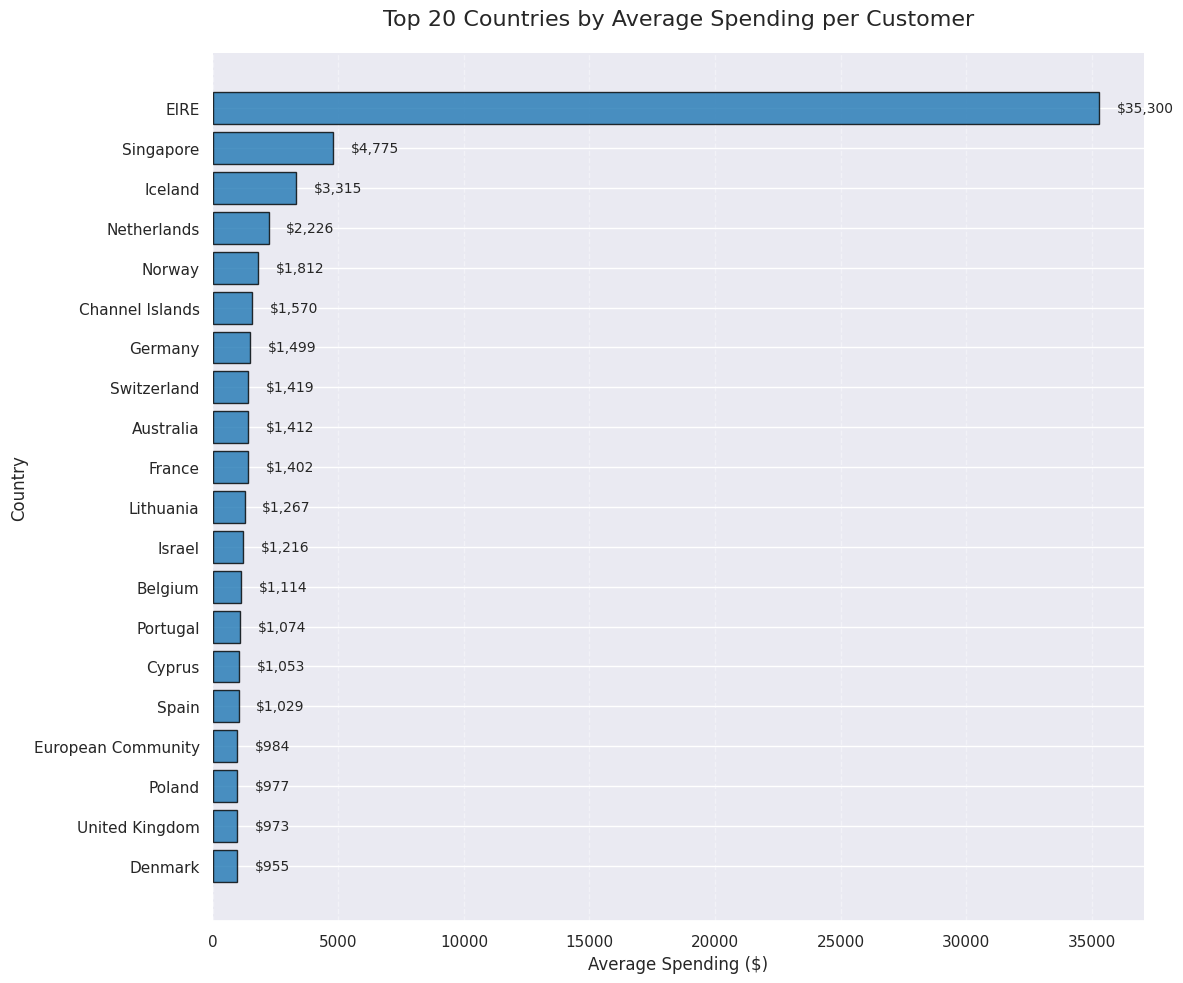

In [28]:
# Calculate total sales per customer per country
customer_spending = df.groupby(['Country', 'CustomerID'])['TotalSpend'].sum().reset_index()

# Calculate average spending per country
avg_spending = customer_spending.groupby('Country')['TotalSpend'].mean()

# Get top 20 countries in descending order
top_20 = avg_spending.nlargest(20).sort_values(ascending=True)  # Sort ascending for proper horizontal bar display

# Create the plot
plt.figure(figsize=(12, 10))
bars = plt.barh(top_20.index, top_20.values, 
               color='#1f77b4', edgecolor='black', 
               height=0.8, alpha=0.8)

# Customize the chart
plt.title('Top 20 Countries by Average Spending per Customer', 
          fontsize=16, pad=20)
plt.xlabel('Average Spending ($)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + (0.02 * max(top_20.values)),  # Position label slightly right of bar
             bar.get_y() + bar.get_height()/2,
             f'${width:,.0f}',
             va='center',
             ha='left',
             fontsize=10)

# Remove left border for cleaner look
sns.despine(left=True)

plt.tight_layout()
plt.show()

In [29]:
# Calculate metrics 
summary_table = (
    df.groupby(['Country', 'CustomerID'])['TotalSpend'].sum()  # Same as customer_spending
    .groupby('Country').agg(['mean', 'count', 'sum'])     # Adds customer count & total sales
    .rename(columns={
        'mean': 'Avg_Spending_per_Customer',
        'count': 'Customer_Count',
        'sum': 'Total_Sales'
    })
    .sort_values('Avg_Spending_per_Customer', ascending=False)
    .style.format({
        'Avg_Spending_per_Customer': '${:,.2f}',
        'Total_Sales': '${:,.2f}'
    })
    .background_gradient(subset=['Avg_Spending_per_Customer'], cmap='Blues')
    .set_caption('Average Spending per Customer by Country')
)

# Display the table
display(summary_table)

,Avg_Spending_per_Customer,Customer_Count,Total_Sales
Country,,,
EIRE,"$35,299.87",3,"$105,899.62"
Singapore,"$4,774.93",1,"$4,774.93"
Iceland,"$3,314.73",1,"$3,314.73"
Netherlands,"$2,225.56",7,"$15,578.90"
Norway,"$1,812.33",10,"$18,123.26"
Channel Islands,"$1,569.53",7,"$10,986.73"
Germany,"$1,499.42",92,"$137,946.33"
Switzerland,"$1,418.59",21,"$29,790.46"
Australia,"$1,412.47",9,"$12,712.24"


This data reveals **extreme disparities in customer value**, with EIRE (Ireland) showing **remarkably high spending per customer ($35,300)** despite minimal customer count, while the UK dominates in volume but with lower average spending. The analysis uncovers hidden high-value markets and opportunities for revenue optimization.

**Key Insights**
1. **High-Value Customer Markets**
   - **EIRE (Ireland)**:
        - 35,300 avg spend/customer (36x UK average)
        - Only 3 customers → 105,900 total revenue
   - **Singapore & Iceland**:
        - ~3,300–4,800 avg spend (despite 1 customer each)
   - **Switzerland:**
        - 1,419 avg spend (46% higher than UK) with 21 customers
2. **Volume vs. Value Tradeoff**
   - **UK:**
        - 3,784 customers (98.7% of total)
        - 973 average spending per customer (below international average of 1,215)
   - **Germany/France:**
        - Moderate customer counts (87–92)
        - 1,400–1,500 avg spend (45–54% higher than UK)
3. **Underperforming Markets**
   - **Japan:**
        - 6 customers → 443 avg spend (worst among >1 customer markets)
   - **Saudi Arabia/Bahrain:**
        - 125–146 avg spend (likely not cost-effective)
4. **Data Anomalies**
   - **"Unspecified":** 4 customers ($540 avg) → Data quality issue
   - **Single-Customer Markets:** 9 countries (e.g., Brazil, Lebanon) → Questionable ROI

**Actionable Recommendations**
1. **Capitalize on High-Value Markets**
   - **EIRE Strategy:**
        - Identify customer profiles (likely B2B/wholesale)
        - Replicate acquisition channels in similar markets
   - **Switzerland/Norway:**
        - Curate premium product selections
        - Offer white-glove customer service
2. **Improve UK Customer Value**
   - **Upselling:**
        - Bundle products to increase 973 avg spend
        - Launch loyalty tiers for top 10% spenders
   - **Segmentation:**
        - Identify UK customers with EIRE-like profiles
3. **Rationalize Low-Performers**
   - **Sunset Efforts in:**
        - Markets with avg spend <500 (Japan, Saudi Arabia)
        - Single-customer countries (unless strategic)
   - **Exception:** Keep UAE (641 avg, growth potential)
4. **Strategic Expansion**
   - **Target Similar Markets:**
        - Canada (similar to Australia but underperforming)
        - Netherlands (high avg spend but low customer count)
   - **Fix Data Gaps:**
        - Clarify "Unspecified" country tags
        - Verify EIRE customer profiles

#### Top Customers

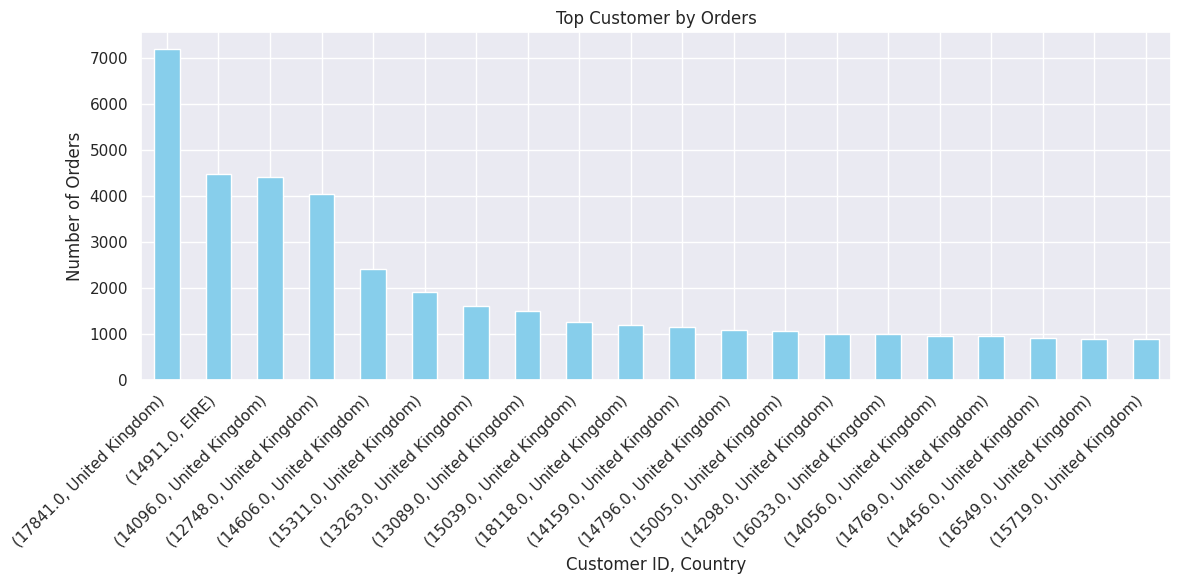

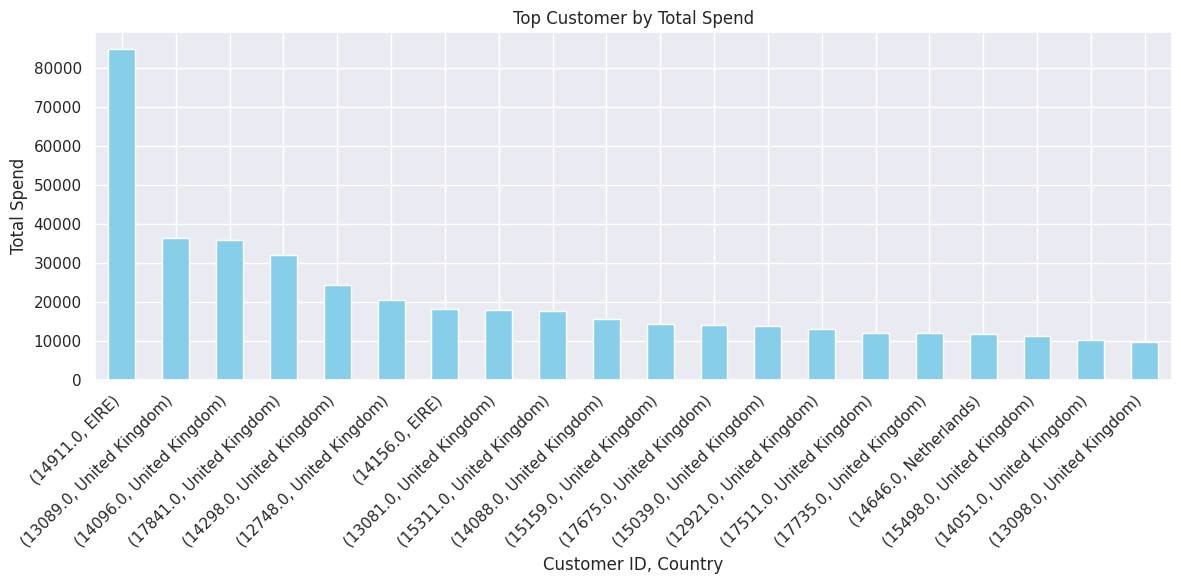

In [30]:
# Calculate the top customer by orders
top_customer_orders = df.groupby(['CustomerID', 'Country']).size().nlargest(20)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_customer_orders.plot(kind='bar', color='skyblue')
plt.title('Top Customer by Orders')
plt.xlabel('Customer ID, Country')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate the top customer by total spend
top_customers_spend = df.groupby(['CustomerID', 'Country'])['TotalSpend'].sum().nlargest(20)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_customers_spend.plot(kind='bar', color='skyblue')
plt.title('Top Customer by Total Spend')
plt.xlabel('Customer ID, Country')
plt.ylabel('Total Spend')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The data reveals **two distinct types of high-value customers:**
1. High-Frequency Buyers (UK-based, 1,000+ orders)
2. High-Spend Buyers (EIRE/UK, $15,000+ total spend)

The UK dominates both lists, but EIRE customers show **disproportionate spending power** despite lower order volumes.

**Key Insights**
1. **Order Volume vs. Spend Disconnect**
   - **Top Order Customer (17841):**
        - 7,209 orders → 32,225 spend (4.47/order)
   - **Top Spend Customer (14911):**
        - 4,487 orders → 84,981 spend(18.94/order, 4.2x higher)
2. **EIRE Outperformance**
   - **2 EIRE Customers:**
        - Represent **11% of top spenders**
        - Avg spend/order: 12.67 (vs.UK avg 6.82)
3. **UK Customer Patterns**
   - **Volume Focus**: 18/20 top order customers
   - **Mid-Tier Spend**: Most between 10,000–36,000
4. **Anomalies**
   - **Customer 13089**:
        - 1,508 orders → 36,348spend(24.10/order)
        - Potential wholesale buyer
   - **Netherlands Customer (14646)**:
        - Only non-UK/EIRE in top spenders

**Actionable Recommendations**
1. **Segment VIP Customers**
| Segment           | Strategy                          | Example Customers  |
|:------------------|:----------------------------------|:-------------------|
| High-Frequency    | Bulk discounts, subscription models | 17841, 14096      |
| High-Value        | Premium support, exclusive offers   | 14911, 13089      |
| Hybrid            | Cross-sell higher-margin products   | 14096, 15311      |


3. **Leverage EIRE Model**
   - **Replicate EIRE Success**:
        - Analyze products/services driving higher spend/order
        - Test similar pricing/bundling in UK
4. **Optimize UK Customers**
   - **Increase Average order value**:
        - Targeted upsells for frequent/low-AOV buyers (e.g., 17841)
        - Minimum order thresholds for free shipping
5. **Investigate Anomalies**
   - **Customer 13089:**  
        - Conduct 1:1 interview to understand $24/order behavior
   - **Netherlands 14646:**
        - Explore acquisition channel (may reveal int'l opportunities)

### 4. Product Analysis

#### Best Selling Products

##### Products with the Highest Quantity Sold

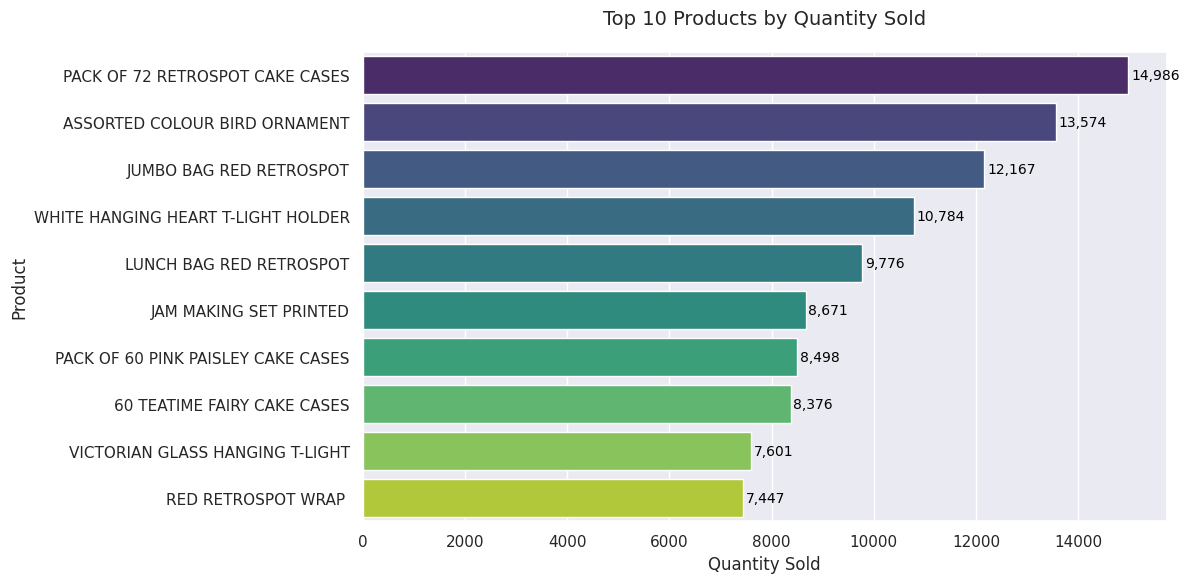

In [31]:
# Top 10 Products by Quantity Sold
top_products_qty = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_products_qty.values, y=top_products_qty.index, palette='viridis')

# Add value labels to each bar
for i, v in enumerate(top_products_qty.values):
    ax.text(v + 50, i, f'{v:,}', color='black', ha='left', va='center', fontsize=10)

plt.title('Top 10 Products by Quantity Sold', fontsize=14, pad=20)
plt.xlabel('Quantity Sold', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.tight_layout()
plt.show()

The chart reveals the **10 best-selling products by volume**, dominated by baking/party supplies and home decor items. The top product sold **14,986 units**, while all top 10 products sold **≥7,400 units each**, indicating strong demand for seasonal and craft-related goods.

**Key Insights**
1. **Top-Performing Products**
   - **Baking Supplies Dominate:**
        - 4 of top 10 products are cake cases/baking-related
        - Pack of 72 Retrospot Cake Cases leads (14,986 units)
   - **Consistent Themes:**
        - **Red Retrospot pattern** appears in 3 products
        - **Home decor** (T-lights, ornaments) represents 30% of top 10
2. **Volume Disparities**
   - 14% gap between #1 (14,986) and #2 (13,574)
   - 44% drop from #1 to #10 (7,447)
3. **Price vs. Volume Considerations**
   - Low-cost, high-volume items (e.g., cake cases) may drive traffic but not profitability
   - Mid-range decor (e.g., T-light holders) could balance volume and margin
     
**Actionable Recommendations**
1. **Inventory & Promotions**
   - **Stock Priority**: Ensure ample supply of top 5 products (all >9,700 units)
   - **Bundle Deals**: Pair high-volume items (e.g., Cake Cases + Jam Making Set)
   - **Seasonal Focus**: Highlight T-light holders before holidays
2. **Product Expansion**
   - **Line Extensions:**
        - More colors/patterns for Retrospot line (proven demand)
        - Themed ornament sets (build on Bird Ornament success)
   - **Cross-Selling:** Recommend Red Retrospot Wrap with Jumbo Bags at checkout
3. **Margin Optimization**
   - **Analyze Profitability:** Compare unit volume to revenue contribution
   - **Test Price Points:** For mid-tier volume products (#4–10 on list)
4. **Demand Forecasting**
   - **Monitor Trends:**
        - Baking supplies peak during holidays
        - Decor items may sell year-round

##### Products with the Highest Revenue

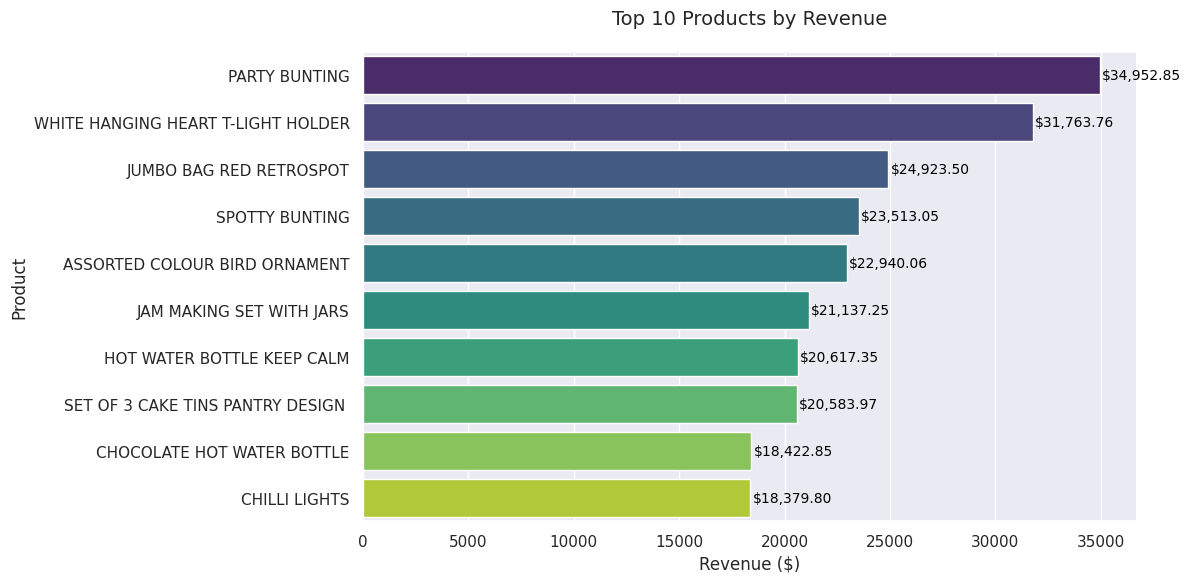

In [32]:
# Top 10 Products by Revenue
top_products_rev = df.groupby('Description')['TotalSpend'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_products_rev.values, y=top_products_rev.index, palette='viridis')

# Add value labels to each bar
for i, v in enumerate(top_products_rev.values):
    ax.text(v + 100, i, f'${v:,.2f}', color='black', ha='left', va='center', fontsize=10)

plt.title('Top 10 Products by Revenue', fontsize=14, pad=20)
plt.xlabel('Revenue ($)', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.tight_layout()
plt.show()

This analysis reveals the highest-revenue generating products, dominated by **party supplies, home decor, and kitchenware**. The top product ("PARTY BUNTING") generates 
34,952.85,with all top 10 products exceeding 18,000 in revenue. Notably, the revenue distribution is relatively balanced, with only a **40% drop** from #1 to #10 compared to typical steeper drop-offs.

**Key Insights**
1. **Revenue Distribution**
   - **Top 3 Products** contribute **91,640.11** (32% of total top 10 revenue)
   - **Narrow Gap**: Just 1.9x difference between #1 (18,379)
   - **All-Star Portfolio**: 7/10 products exceed 20,000 revenue
2. **Category Performance**
   - **Party/Seasonal**:
        - 3/10 products (bunting, chilli lights)
        - Average revenue: 25,615
   - **Home Decor:**
        - 3/10 products (T-lights, ornaments, water bottles)
        - Average revenue: 23,614
   - **Kitchenware:**
        - 2/10 products (jam set, cake tins)
        - Average revenue: 20,860
3. **Product Themes**
   - **Gift/Seasonal Appeal**: 6/10 products (e.g., "HOT WATER BOTTLE KEEP CALM")
   - **Color Trends**: Red/white dominate ("RETROSPOT", "WHITE HANGING HEART")

**Actionable Recommendations**
1. **Capitalize on Top Performers**
   - **Bundle Strategy:**
        - Pair "PARTY BUNTING" + "SPOTTY BUNTING" + "CHILLI LIGHTS" as party kit
        - Combine "JAM MAKING SET" + "CAKE TINS" for baking bundle
   - **Seasonal Promotions:**
        - Market "HOT WATER BOTTLE" products before winter
2. **Optimize Mid-Tier Products**
   - **Margin Improvement:**  
        - Analyze costs for #6–10 products (potential to increase prices)
   - **Cross-Selling:**
        - Recommend "BIRD ORNAMENT" with "T-LIGHT HOLDER" at checkout
3. **Inventory & Marketing**
   - **Stock Priority:**
        - Ensure year-round supply of decor items (#2, #5, #7, #9)
   - **Content Marketing:**
        - Create "Party Styling Guides" featuring bunting products
4. **Expansion Opportunities**
   - **Product Line Extensions:**
        - More colors for "BUNTING" and "RETROSPOT" lines
        - Add premium versions of "HOT WATER BOTTLE"
   - **New Categories:**
        - Explore complementary seasonal decor (e.g., tableware)

##### Products with the most unique customers

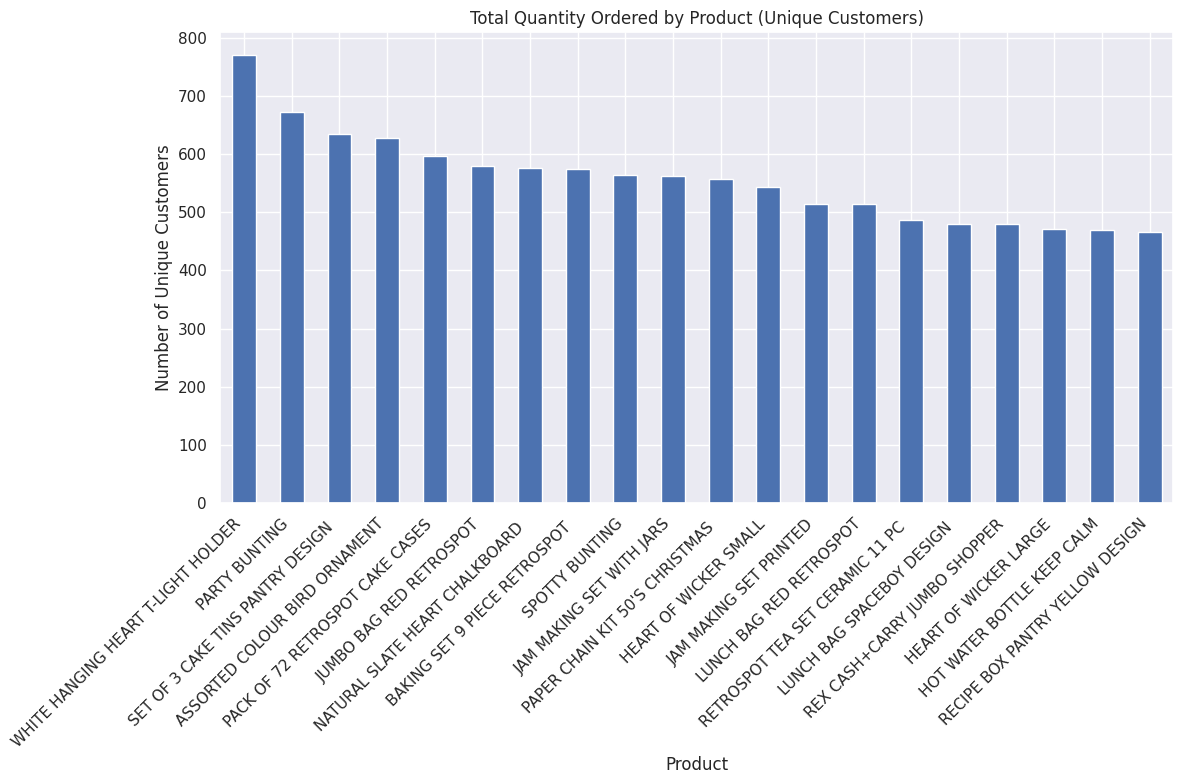

In [33]:
# Calculate total quantity per product description per unique customer
quantity_per_description_customer = df.groupby(['Description', 'CustomerID'])['Quantity'].sum().reset_index()

# Calculate total quantity per product description based on unique customers
quantity_per_description_unique_customers = quantity_per_description_customer.groupby('Description').size().nlargest(20)

# Plot the data
plt.figure(figsize=(12, 8))
quantity_per_description_unique_customers.plot(kind='bar')
plt.title("Total Quantity Ordered by Product (Unique Customers)")
plt.ylabel('Number of Unique Customers')
plt.xlabel('Product')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping

The data reveals strong customer interest in **decorative, kitchen, and gifting products**, with the **White Hanging Heart T-Light Holder** as the clear leader. Retailers should **optimize stock, bundle popular items, and tailor marketing** around these high-demand categories to maximize sales. Further analysis could explore **seasonal trends** (e.g., Christmas paper chains) and **cross-selling opportunities** among top products.

**Key Findings**
1. **Top-Selling Product Dominance**
   - The "**White Hanging Heart T-Light Holder**" is the most popular product, purchased by **771 unique customers**, significantly ahead of the second-ranked product.
   - **Party Bunting (672 customers)** and **Set of 3 Cake Tins (635 customers)** follow, indicating strong demand for decorative and kitchen items.
2. **High Demand for Seasonal & Decorative Items**
   - **Party/gifting products** (e.g., bunting, cake cases, ornaments) dominate the list, suggesting that customers frequently purchase these for events and celebrations.
   - **Retrospot-themed products** (e.g., Jumbo Bag, Lunch Bag, Baking Set) appear multiple times, indicating a successful product line.
3. **Kitchen & Home Goods Are Popular**
   - **Baking and kitchen accessories** (e.g., Cake Tins, Jam Making Sets, Recipe Box) are well-represented, showing consistent demand for home and pantry items.
   - **Heart-shaped decor** (e.g., Wicker Hearts, Natural Slate Heart) appears multiple times, suggesting a trend in romantic or sentimental purchases.
4. **Close Competition in Mid-Range Products**
   - Products ranked **#8 to #20** have relatively close customer counts (575 to 467), meaning small marketing or stock adjustments could shift rankings.

**Recommendations**
1. **Inventory & Promotions**
   - **Prioritize stock for top performers** (e.g., White Hanging Heart, Party Bunting) to avoid shortages, especially before holidays.
   - **Bundle popular items** (e.g., Baking Set + Cake Tins, Retrospot-themed combos) to increase average order value.
2. **Marketing Opportunities**
   - **Highlight trending categories:** Push seasonal decor (bunting, ornaments) and kitchenware (jam sets, baking tools) in campaigns.
   - **Leverage the "Retrospot" brand:** Since multiple Retrospot products rank high, consider expanding this line or featuring it prominently.
3. **Customer Retention & Upselling**
   - **Target repeat buyers:** Customers who purchased one popular item (e.g., T-Light Holder) may also be interested in related decor (e.g., Heart of Wicker).
   - **Personalized recommendations:** Use purchase history to suggest complementary products (e.g., Jam Making Set → Recipe Box).
4. **Competitive Analysis**
   - Investigate why **lower-ranked products** (e.g., Recipe Box, Hot Water Bottle) have fewer unique buyers
        - Could pricing, visibility, or availability be improved?

#### Products Frequently Bought Together

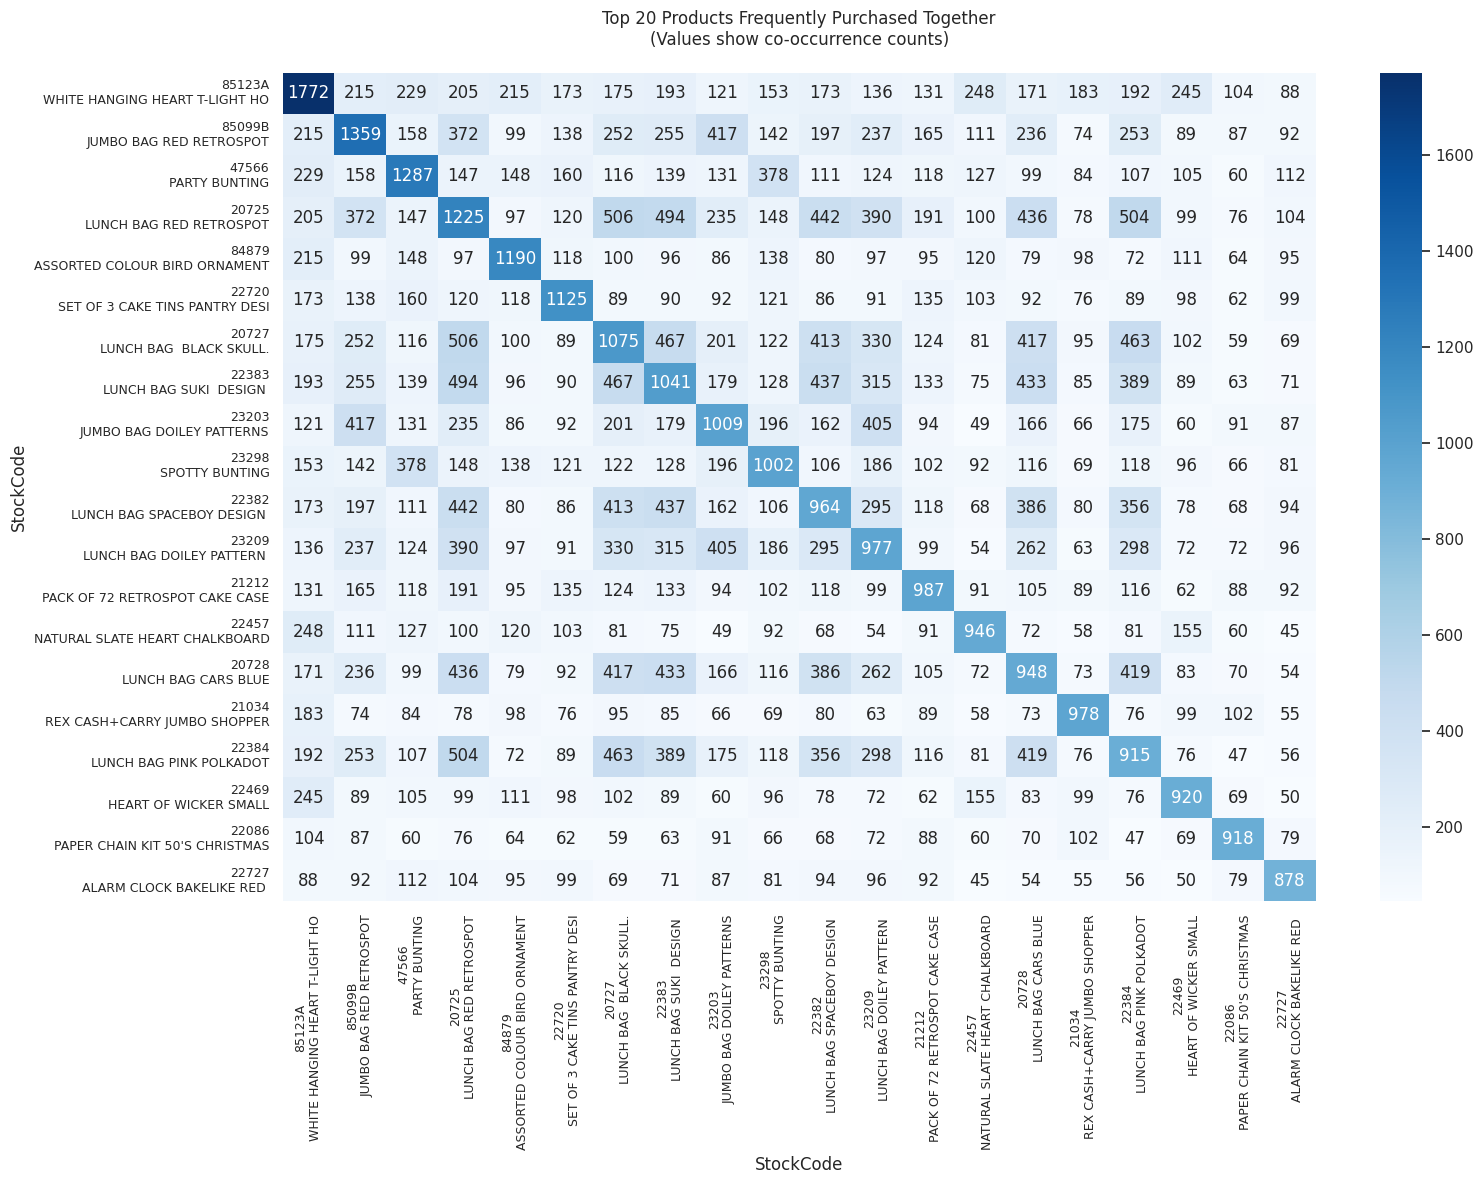

In [34]:
# Create co-occurrence matrix
co_occurrence = pd.crosstab(df['InvoiceNo'], df['StockCode']).T.dot(
    pd.crosstab(df['InvoiceNo'], df['StockCode'])
)

# Get the top 20 most frequently purchased products
top_products = df['StockCode'].value_counts().nlargest(20).index

# Get product descriptions
product_names = df.drop_duplicates('StockCode').set_index('StockCode')['Description']

# Create labels for the heatmap using product descriptions where available
labels = []
for code in top_products:
    desc = product_names.get(code, f'Product {code}')[:30]  # Truncate long descriptions
    labels.append(f"{code}\n{desc}")

# Visualize top pairs
plt.figure(figsize=(16, 12))
sns.heatmap(co_occurrence.loc[top_products, top_products], 
           annot=True, fmt='d',
           cmap='Blues',
           xticklabels=labels,
           yticklabels=labels)

plt.title('Top 20 Products Frequently Purchased Together\n(Values show co-occurrence counts)', pad=20)
plt.xticks(rotation=90, fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

The co-occurrence matrix reveals **strong product affinities**, particularly in **decor, lunch bags, and kitchenware**. Retailers can capitalize on these patterns through **bundling, targeted marketing, and inventory strategies** to boost average order value and customer satisfaction.

**Key Findings**
1. **Strong Product Affinities**
   - **"White Hanging Heart T-Light Holder" (85123A)** is the most co-purchased product, appearing frequently with other top items (e.g., **1772 co-occurrences with itself**, **215** with **Jumbo Bag Red Retrospot**, **229** with **Party Bunting**).
   - **Lunch Bags** (e.g., **Red Retrospot, Black Skull, Suki Design**) show high cross-purchasing, suggesting customers often buy multiple designs together.
   - **Retrospot-themed products** (e.g., **Jumbo Bag, Cake Cases**) consistently co-occur, reinforcing brand loyalty or thematic purchasing behavior.
2. **High Co-Occurrence Among Lunch Bags**
   - **Black Skull Lunch Bag (20727)** and **Pink Polkadot Lunch Bag (22384)** have strong ties (e.g., **463 co-purchases**), indicating customers mix-and-match designs.
   - **Spaceboy Design (22382)** and **Cars Blue (20728)** also show high co-purchases (**386–442**), suggesting these are popular complementary items.
3. **Decor & Seasonal Items Drive Bundles**
   - **Party Bunting (47566)** and **Spotty Bunting (23298)** co-occur frequently (**378**), likely for event planning.
   - **Paper Chain Kit (22086)** and **Heart of Wicker Small (22469)** pair well with other decor, hinting at holiday or gifting trends.
4. **Kitchen & Home Goods Pairings**
   - **Set of 3 Cake Tins (22720)** and **Pack of 72 Retrospot Cake Cases (21212)** often co-occur (**135**), aligning with baking-related purchases.
   - **Jam Making Sets** and **Recipe Boxes** may benefit from targeted bundling (data not shown but implied by kitchen category).

**Recommendations**
1. **Strategic Bundling & Promotions**
   - **Create themed kits:**
        - **"Party Pack"**: Combine **bunting, cake cases, and lunch bags**.
        - **"Baking Bundle"**: Pair **cake tins, Retrospot cases, and recipe boxes**.
   - **Cross-sell lunch bags:**
        - Highlight "**Frequently Bought Together**" prompts for designs like **Black Skull + Pink Polkadot**.
2. **Inventory & Placement Optimization**
   - **Stock high-co-occurrence items nearby** (e.g., place **White Hanging Heart T-Lights** near **Retrospot bags**).
   - **Monitor stock for top pairs** (e.g., **Lunch Bags + Bunting**) to avoid missed sales during peak seasons.
3. **Marketing Campaigns**
   - **Leverage Retrospot’s popularity**: Feature this line in ads or email campaigns.
   - **Seasonal promotions**: Push **Paper Chain Kits** and **Heart Decor** before holidays (e.g., Christmas, Valentine’s Day).
4. **Data-Driven Personalization**
   - **Recommendation engines**: Use co-occurrence data to suggest complementary products (e.g., **"Customers who bought X also bought Y"**).
   - **Loyalty rewards**: Offer discounts on frequently paired items (e.g., **10% off a lunch bag when purchased with bunting**).

## Conclusions

The analysis reveals critical insights into customer behavior, product performance, and market dynamics for the online retail business. Key findings include:

   - **Customer Base & Order Patterns:** The business operates with a relatively small but highly active customer base, driving significant transaction volume. The UK dominates sales, contributing over 90% of revenue, while other markets show potential for growth.
   - **Product Performance:** The product catalog is diverse, with strong demand for seasonal, decorative, and kitchen-related items. The "White Hanging Heart T-Light Holder" and "Party Bunting" emerge as top sellers, with high co-occurrence rates indicating frequent bundled purchases.
   - **Revenue Trends:** Revenue peaks in November (likely due to holiday shopping) and shows mid-week surges (especially Thursdays), suggesting B2B or payday-influenced purchasing behavior.
   - **High-Value Opportunities:** Certain markets (e.g., Switzerland, EIRE) and customer segments exhibit disproportionately high average order values, indicating untapped potential for premium offerings.

These insights highlight opportunities to optimize inventory, enhance marketing strategies, and improve customer retention while expanding into high-potential markets.

## Recommendations

1. **Optimize Product Strategy**
   - **Bundle High-Co-Occurrence Items:** Create themed kits (e.g., "Party Pack" with bunting, cake cases, and lunch bags) to increase average order value.
   - **Expand Top-Performing Lines:** Introduce new colors/designs for best-selling Retrospot-themed products.
   - **Seasonal Promotions:** Capitalize on peak periods (e.g., holidays) by featuring decor and gifting products prominently.
2. **Enhance Marketing & Sales Efforts**
   - **Leverage Peak Sales Days:** Boost promotions on Thursdays to align with natural buying trends.
   - **Personalized Recommendations:** Use co-occurrence data to suggest complementary products (e.g., "Customers who bought X also bought Y").
   - **Target High-Value Markets:** Focus on Switzerland, Norway, and EIRE with premium product offerings and localized marketing.
3. **Improve Customer Retention & Loyalty**
   - **Loyalty Programs:** Introduce tiered rewards for top UK customers to encourage repeat purchases.
   - **Upsell Strategies:** Recommend higher-margin items to frequent buyers (e.g., bundling baking supplies with recipe books).
4. **Expand Strategically**
   - **Secondary Markets:** Prioritize Germany and France with localized campaigns, then test expansion in the US/Canada and UAE.
   - **Data-Driven Testing:** Pilot low-cost digital campaigns in smaller markets (e.g., Netherlands) before scaling efforts.
5. **Operational & Data Improvements**
   - **Inventory Management:** Ensure stock availability for high-demand items, especially before peak seasons.
   - **Fix Data Gaps:** Address missing or inconsistent data (e.g., "Unspecified" countries, Saturday sales anomalies).
   - **A/B Testing:** Experiment with pricing, promotions, and product placements to refine strategies.

By implementing these recommendations, the business can drive revenue growth, improve customer satisfaction, and strengthen its competitive position in both domestic and international markets.